## Imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
from scipy import integrate, signal
import sympy

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Functions

In [3]:
def photons_from_temp(ω_c, temp):
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω_c / temp) - 1) ** -1

In [4]:
def temp_from_photons(ω_c, num_photons):
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω_c / np.log(1 / num_photons + 1)

In [5]:
def output_noise(ω, κ, γ, Γ, r, g, nT, nc):
    """
    function for calculating the number noise photons in the output port of the cavity-NV ensemble setup
    :param ω:         the frequency range over which the integration is performed
    :param κ:         the coupling rate of the input port
    ;param γ:         the internal loss rate of the cavity
    :param Γ:         the coupling rate of the output port
    :param r:         the inhomogenous broadening of the spins
    :param g:         the collective coupling strength of the NV ensemble to the cavity
    :param nT:        the number of thermal photons at temperature T
    :param nc:        the number of effective photons from the spins
    :return:          the number of noise photons in the output port
    """
    # Define the numerator in parts
    num_a = (r ** 2 / 4 + ω ** 2) * (κ + γ) * Γ * nT + Γ * r * g ** 2 * nc
    num_b = np.abs(((Γ - κ - γ) / 2 + 1j * ω) * (r / 2 - 1j * ω) - g ** 2) ** 2 * nT
    num = num_a + num_b

    # Define the denominator
    den = np.abs(((κ + γ + Γ) / 2 - 1j * ω) * (r / 2 - 1j * ω) + g ** 2) ** 2

    return integrate.simpson(1 / (2 * np.pi) * num / den, x=ω, axis=0)

In [6]:
def output_signal(ω, κ, γ, Γ, r, g, S):
    """
    function for calculating the number of signal photons in the output port of the cavity-NV ensemble setup
    :param ω:         the frequency range over which the integration is performed
    :param κ:         the coupling rate of the input port
    ;param γ:         the internal loss rate of the cavity
    :param Γ:         the coupling rate of the output port
    :param r:         the inhomogenous broadening of the spins
    :param g:         the collective coupling strength of the NV ensemble to the cavity
    :param S:         the power spectral density of the input signal
    :return:          the number of signal photons in the output port
    """
    # Define the numerator
    num = (r ** 2 / 4 + ω ** 2) * Γ * κ

    # Define the denominator
    den = np.abs(((κ + γ + Γ) / 2 - 1j * ω) * (r / 2 - 1j * ω) + g ** 2) ** 2

    return integrate.simpson(1 / (2 * np.pi) * num / den * S, x=ω, axis=0)

In [7]:
def bare_cav_noise(ω, κ, γ, Γ, nT):
    num = Γ * (κ + γ) * nT + np.abs((Γ - κ - γ) / 2 + 1j * ω) ** 2 * nT
    den = np.abs((κ + γ + Γ) / 2 - 1j * ω) ** 2
    return integrate.simpson(1 / (2 * np.pi) * num / den, x=ω, axis=0)

In [30]:
def bc_noise_b(ω, κ, γ, Γ, nT):
    num = γ * (κ + Γ) * nT + np.abs((γ - κ - Γ) / 2 + 1j * ω) ** 2 * nT
    den = np.abs((κ + γ + Γ) / 2 - 1j * ω) ** 2
    return integrate.simpson(1 / (2 * np.pi) * num / den, x=ω, axis=0)

In [31]:
def bc_noise_a(ω, κ, γ, Γ, nT):
    num = κ * (γ + Γ) * nT + np.abs((κ - γ - Γ) / 2 + 1j * ω) ** 2 * nT
    den = np.abs((κ + γ + Γ) / 2 - 1j * ω) ** 2
    return integrate.simpson(1 / (2 * np.pi) * num / den, x=ω, axis=0)

In [20]:
def bare_cav_signal(ω, κ, γ, Γ, S):
    num = Γ * κ * S
    den = np.abs((κ + γ + Γ) / 2 - 1j * ω) ** 2
    return integrate.simpson(1 / (2 * np.pi) * num / den, x=ω, axis=0)

## Bare Cavity Results

In [91]:
# Define cavity parameters
ωc = 2 * np.pi * 2.87e9
Q = 1e6
γ = ωc / Q
κ = γ
Γ = κ

# Define temperature
T = 300
nT = photons_from_temp(ωc, T)

# Define signal
S = 10 * nT

In [92]:
# Define frequency range
ω = 2 * np.pi * np.linspace(-5, 5, 1000) * 1e4

In [93]:
# Calculate number of noise and signal photons for the bare cavity
bc_noise = bare_cav_noise(ω, κ, γ, Γ, nT)
bc_signal = bare_cav_signal(ω, κ, γ, Γ, nT)

# Define input noise and signal
input_noise = (2 * ω[-1] * nT) / (2 * np.pi)
input_signal = 2 * ω[-1] * S / (2 * np.pi)

In [94]:
# Print
print("Normal noise: %.8e" % ((2 * ω[-1] * nT) / (2 * np.pi)))
print("BC Noise: %.8e" % bc_noise)
print("")

print("Normal signal: %.3e" % ((2 * ω[-1] * S) / (2 * np.pi)))
print("BC Signal: %.3e" % bc_signal)

Normal noise: 2.17732504e+08
BC Noise: 2.17732504e+08

Normal signal: 2.177e+09
BC Signal: 1.237e+07


So from these results, we can see that there's no attenuation of the noise by the bare cavity when each port is at the same temperature and the couplings are all the same.  Now let's see what happens if we sweep over $\kappa$ and $\Gamma$.

In [101]:
# Define ranges for κ and Γ
κ = np.logspace(3, 6, 100)
Γ = κ.copy()

# Create meshgrid
κm, ωm, Γm = np.meshgrid(κ, ω, Γ)

In [102]:
# Define input noise and signal
input_noise = (2 * ω[-1] * nT) / (2 * np.pi)
input_signal = 2 * ω[-1] * S / (2 * np.pi)

# Calculate noise and signal photons for the bare cavity across this sweep
bc_noise = bare_cav_noise(ωm, κm, γ, Γm, nT)
bc_signal = bare_cav_signal(ωm, κm, γ, Γm, nT)

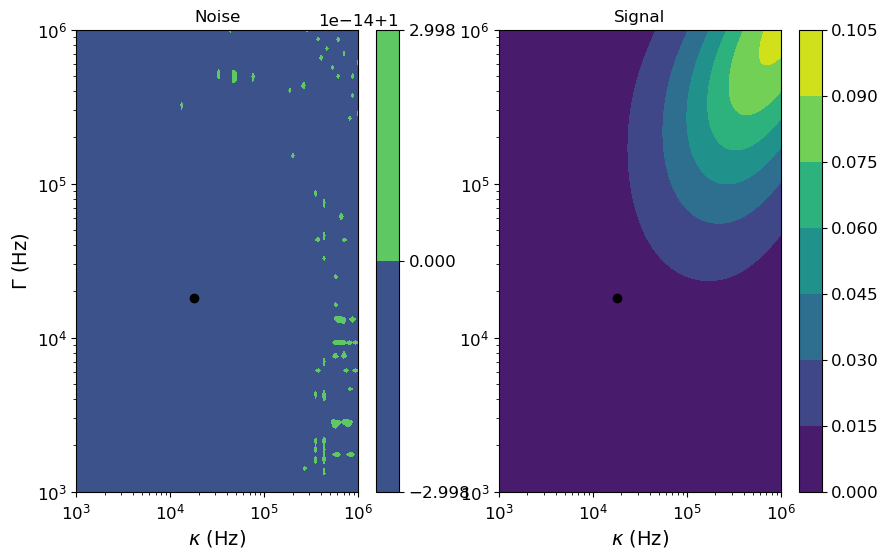

In [103]:
# Plot
fig = plt.figure(1, figsize=(10, 6))
ax = fig.subplots(1, 2)
im0 = ax[0].contourf(κm[0], Γm[0], bc_noise / input_noise)
ax[0].scatter(γ, γ, color='k')
ax[0].set_xlabel("$\\kappa$ (Hz)")
ax[0].set_ylabel("$\\Gamma$ (Hz)")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("Noise")
fig.colorbar(im0)

im1 = ax[1].contourf(κm[0], Γm[0], bc_signal / input_signal)
ax[1].scatter(γ, γ, color='k')
ax[1].set_xlabel("$\\kappa$ (Hz)")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title("Signal")
fig.colorbar(im1)

## NV Ensemble Results

In [104]:
# We'll start with a good NV ensemble setup
g = 1e6
r = 2 * g
P = 0.8
nc = 0.5 * (1 - P) / P

In [105]:
# Calculate the noise and signal photons over the same sweep used above
nv_noise = output_noise(ωm, κm, γ, Γm, g, r, nT, nc)
nv_signal = output_signal(ωm, κm, γ, Γm, g, r, S)

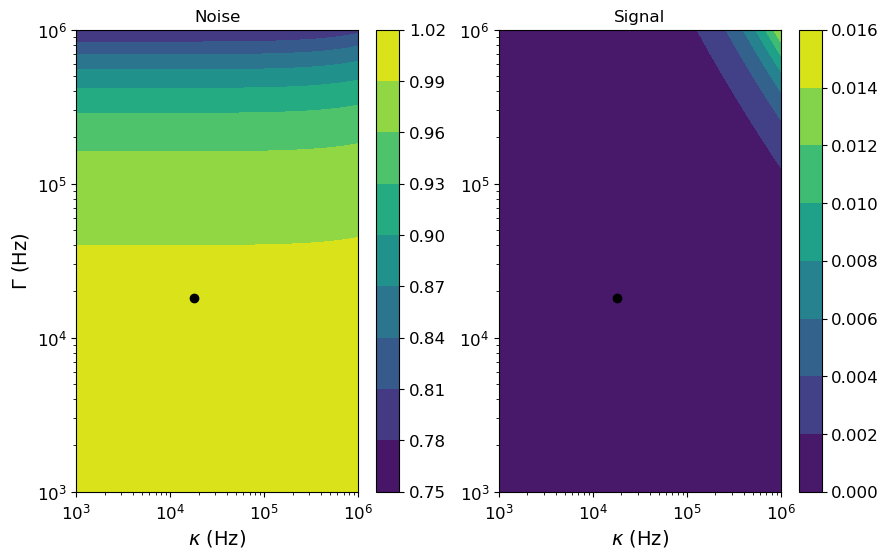

In [106]:
# Plot
fig = plt.figure(1, figsize=(10, 6))
ax = fig.subplots(1, 2)
im0 = ax[0].contourf(κm[0], Γm[0], nv_noise / input_noise)
ax[0].scatter(γ, γ, color='k')
ax[0].set_xlabel("$\\kappa$ (Hz)")
ax[0].set_ylabel("$\\Gamma$ (Hz)")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("Noise")
fig.colorbar(im0)

im1 = ax[1].contourf(κm[0], Γm[0], nv_signal / input_signal)
ax[1].scatter(γ, γ, color='k')
ax[1].set_xlabel("$\\kappa$ (Hz)")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title("Signal")
fig.colorbar(im1)

## Comparison

Let's try defining an attenuation coefficient as the ratio of the output signal to the original and then plotting that against the noise and signal levels.